<a href="https://colab.research.google.com/github/Subi00001/Tesla_Stock_Prediction/blob/main/Tesla_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1827150.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2015-01-01', end='2025-12-31')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Price           Close       High        Low       Open    Volume
Ticker           TSLA       TSLA       TSLA       TSLA      TSLA
Date                                                            
2015-01-02  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.253333  14.000667  14.187333  51637500
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0140
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 9.2508e-04
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 8.5116e-04
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 8.0145e-04
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 5.1309e-04
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 5.6693e-04
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.201

/tmp/ipython-input-1827150.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


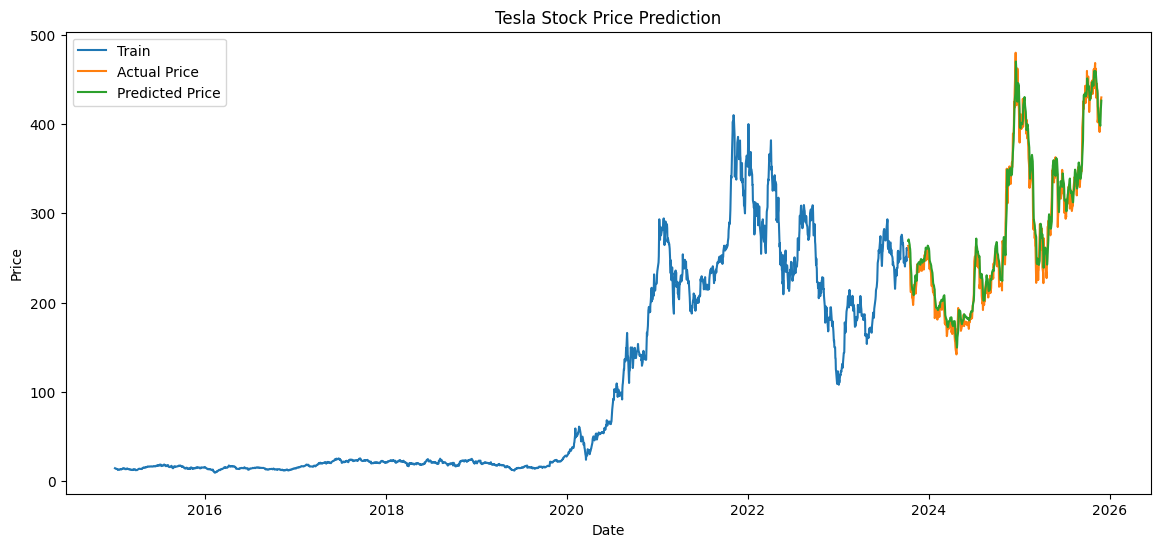

In [ ]:
# Step 1: Install necessary libraries (run this in Colab)
!pip install yfinance
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow

# Step 2: Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Step 3: Fetch Tesla stock data
ticker = 'TSLA'
data = yf.download(ticker, start='2015-01-01', end='2025-12-31')
print(data.head())

# Step 4: Prepare the data (we'll use 'Close' price)
close_prices = data['Close'].values
close_prices = close_prices.reshape(-1, 1)

# Step 5: Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Step 6: Create sequences for time series prediction
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape X to [samples, time_steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 7: Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 8: Build LSTM neural network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 9: Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20)

# Step 10: Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Step 11: Visualize the results
train = data[:train_size+time_step]
valid = data[train_size+time_step:]
valid['Predictions'] = predictions

plt.figure(figsize=(14,6))
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()